In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_fuml_salary_17-18')

In [3]:
tes.dtypes

NAME          object
FUML           int64
FUML_rank    float64
salary         int64
dtype: object

In [4]:
tes.head()

,NAME,FUML,FUML_rank,salary
0,Rob Gronkowski,0,26.0,9000000
1,Darren Fells,0,26.0,1000000
2,Jermaine Gresham,0,26.0,7000000
3,Luke Willson,0,26.0,1800000
4,Vance McDonald,0,26.0,6550000


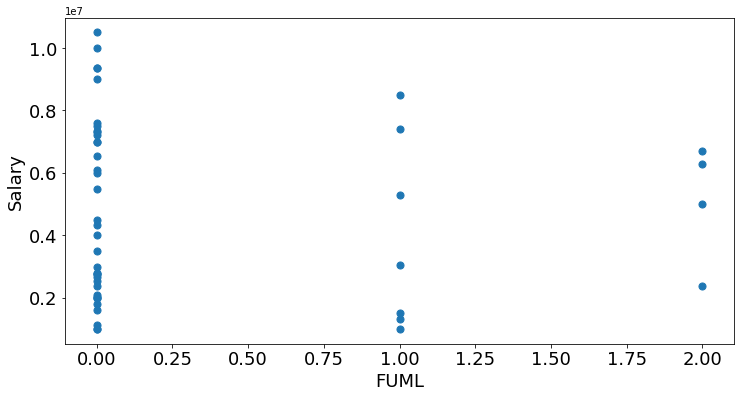

In [5]:
ax = tes.plot(kind="scatter", x = 'FUML',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('FUML', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['FUML', 'salary']])

In [7]:
X.mean(axis = 0)

array([1.88974132e-17, 2.36217665e-18])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 1.09373748, -1.07024531],
       [-0.51268945,  1.07010783],
       [-0.51268945, -0.79479383],
       [ 2.70016441,  0.13313334],
       [ 1.09373748,  0.84086641]])

In [11]:
km.predict(X)

array([1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 4, 0, 4, 0, 0, 4, 3,
       3, 3, 3], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,FUML,FUML_rank,salary,clusters
0,Rob Gronkowski,0,26.0,9000000,1
1,Darren Fells,0,26.0,1000000,2
2,Jermaine Gresham,0,26.0,7000000,1
3,Luke Willson,0,26.0,1800000,2
4,Vance McDonald,0,26.0,6550000,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.00000000e+00, 1.72507975e+06],
       [5.55111512e-17, 7.70740000e+06],
       [5.55111512e-17, 2.49497090e+06],
       [2.00000000e+00, 5.08854175e+06],
       [1.00000000e+00, 7.06666667e+06]])

In [14]:
tes.groupby('clusters')[['FUML', 'salary']].mean()

,FUML,salary
clusters,,
0,1.0,1.725080e+06
1,0.0,7.707400e+06
2,0.0,2.494971e+06
3,2.0,5.088542e+06
4,1.0,7.066667e+06


In [15]:
centroids = tes.groupby('clusters')[['FUML', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

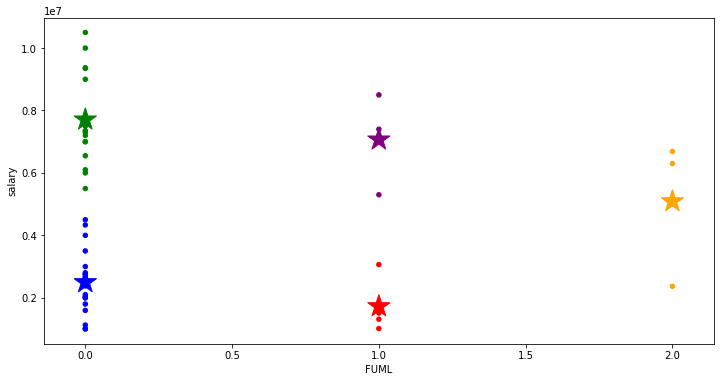

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = 'FUML', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'FUML', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

9.270195917148081

In [18]:
silhouette_score(X, km.labels_)

0.6553235160429863